# DATA

In [16]:
import savReaderWriter as sav
import pandas as pd
import chardet
import pyreadstat as prs
import geopandas as gpd
import matplotlib.pyplot as plt 

In [3]:
base = open(r'_data/censo_interh.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [4]:
data = pd.read_csv(r'_data/censo_interh.csv', encoding = charenc, thousands = ' ', dtype = {'Código': str})

In [5]:
data.dtypes

Código                          object
Distrito                        object
Sí tiene conexión a internet     int64
No tiene conexión a internet     int64
dtype: object

In [6]:
data['Departamento'] = data.loc[:, 'Distrito'].copy().str.split(', ').apply(lambda row: row[ 0 ])
data

,Código,Distrito,Sí tiene conexión a internet,No tiene conexión a internet,Departamento
0,10101,"Amazonas, Chachapoyas, distrito: Chachapoyas",1534,6825,Amazonas
1,10102,"Amazonas, Chachapoyas, distrito: Asunción",0,104,Amazonas
2,10103,"Amazonas, Chachapoyas, distrito: Balsas",3,352,Amazonas
3,10104,"Amazonas, Chachapoyas, distrito: Cheto",6,214,Amazonas
4,10105,"Amazonas, Chachapoyas, distrito: Chiliquin",0,206,Amazonas
...,...,...,...,...,...
1869,250302,"Ucayali, Padre Abad, distrito: Irazola",70,2493,Ucayali
1870,250303,"Ucayali, Padre Abad, distrito: Curimana",22,1862,Ucayali
1871,250304,"Ucayali, Padre Abad, distrito: Neshuya",61,1864,Ucayali
1872,250305,"Ucayali, Padre Abad, distrito: Alexander Von H...",30,1265,Ucayali


In [7]:
data[ 'Provincia' ] = data.loc[ :, 'Distrito' ].copy().str.split( ', ' ).apply( lambda row: row[ 1 ] )
data

,Código,Distrito,Sí tiene conexión a internet,No tiene conexión a internet,Departamento,Provincia
0,10101,"Amazonas, Chachapoyas, distrito: Chachapoyas",1534,6825,Amazonas,Chachapoyas
1,10102,"Amazonas, Chachapoyas, distrito: Asunción",0,104,Amazonas,Chachapoyas
2,10103,"Amazonas, Chachapoyas, distrito: Balsas",3,352,Amazonas,Chachapoyas
3,10104,"Amazonas, Chachapoyas, distrito: Cheto",6,214,Amazonas,Chachapoyas
4,10105,"Amazonas, Chachapoyas, distrito: Chiliquin",0,206,Amazonas,Chachapoyas
...,...,...,...,...,...,...
1869,250302,"Ucayali, Padre Abad, distrito: Irazola",70,2493,Ucayali,Padre Abad
1870,250303,"Ucayali, Padre Abad, distrito: Curimana",22,1862,Ucayali,Padre Abad
1871,250304,"Ucayali, Padre Abad, distrito: Neshuya",61,1864,Ucayali,Padre Abad
1872,250305,"Ucayali, Padre Abad, distrito: Alexander Von H...",30,1265,Ucayali,Padre Abad


In [8]:
data['Distrito'] = data.loc[ :, 'Distrito' ].copy().str.split( 'distrito: ' ).apply( lambda row: row[ 1 ] )
data

,Código,Distrito,Sí tiene conexión a internet,No tiene conexión a internet,Departamento,Provincia
0,10101,Chachapoyas,1534,6825,Amazonas,Chachapoyas
1,10102,Asunción,0,104,Amazonas,Chachapoyas
2,10103,Balsas,3,352,Amazonas,Chachapoyas
3,10104,Cheto,6,214,Amazonas,Chachapoyas
4,10105,Chiliquin,0,206,Amazonas,Chachapoyas
...,...,...,...,...,...,...
1869,250302,Irazola,70,2493,Ucayali,Padre Abad
1870,250303,Curimana,22,1862,Ucayali,Padre Abad
1871,250304,Neshuya,61,1864,Ucayali,Padre Abad
1872,250305,Alexander Von Humboldt,30,1265,Ucayali,Padre Abad


In [9]:
def correct_ubigeo(string):
    if len(string) == 5:
        string = '0' + string
    return string

In [10]:
data.loc[:, 'Código'] = data.apply(lambda row: correct_ubigeo(row['Código']), axis = 1)

In [12]:
data = data.rename(columns = {'Sí tiene conexión a internet':'int_con_yes', 'No tiene conexión a internet':'int_con_no'})

In [19]:
data['Total'] = data['int_con_yes'] + data['int_con_no']

In [21]:
data['prop_int_yes'] = data['int_con_yes'] / data['Total']

# GEODATA

In [13]:
shp_distritos = gpd.read_file(r'_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [14]:
shp_distritos

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [22]:
geo_data = shp_distritos.merge(data, left_on = 'UBIGEO', right_on = 'Código')
geo_data

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,...,CONTACTO,geometry,Código,Distrito,int_con_yes,int_con_no,Departamento,Provincia,Total,prop_int_yes
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,...,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",060504,Guzmango,1,874,Cajamarca,Contumazá,875,0.001143
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,...,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",061105,El Prado,0,549,Cajamarca,San Miguel,549,0.000000
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,...,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",061109,Niepos,7,1106,Cajamarca,San Miguel,1113,0.006289
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,...,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",061110,San Gregorio,1,759,Cajamarca,San Miguel,760,0.001316
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,...,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",061203,San Luis,1,326,Cajamarca,San Pablo,327,0.003058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,...,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",040404,Chachas,2,496,Arequipa,Castilla,498,0.004016
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,...,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",040405,Chilcaymarca,6,298,Arequipa,Castilla,304,0.019737
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,...,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",040406,Choco,0,299,Arequipa,Castilla,299,0.000000
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,...,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",040407,Huancarqui,38,478,Arequipa,Castilla,516,0.073643


<AxesSubplot:>

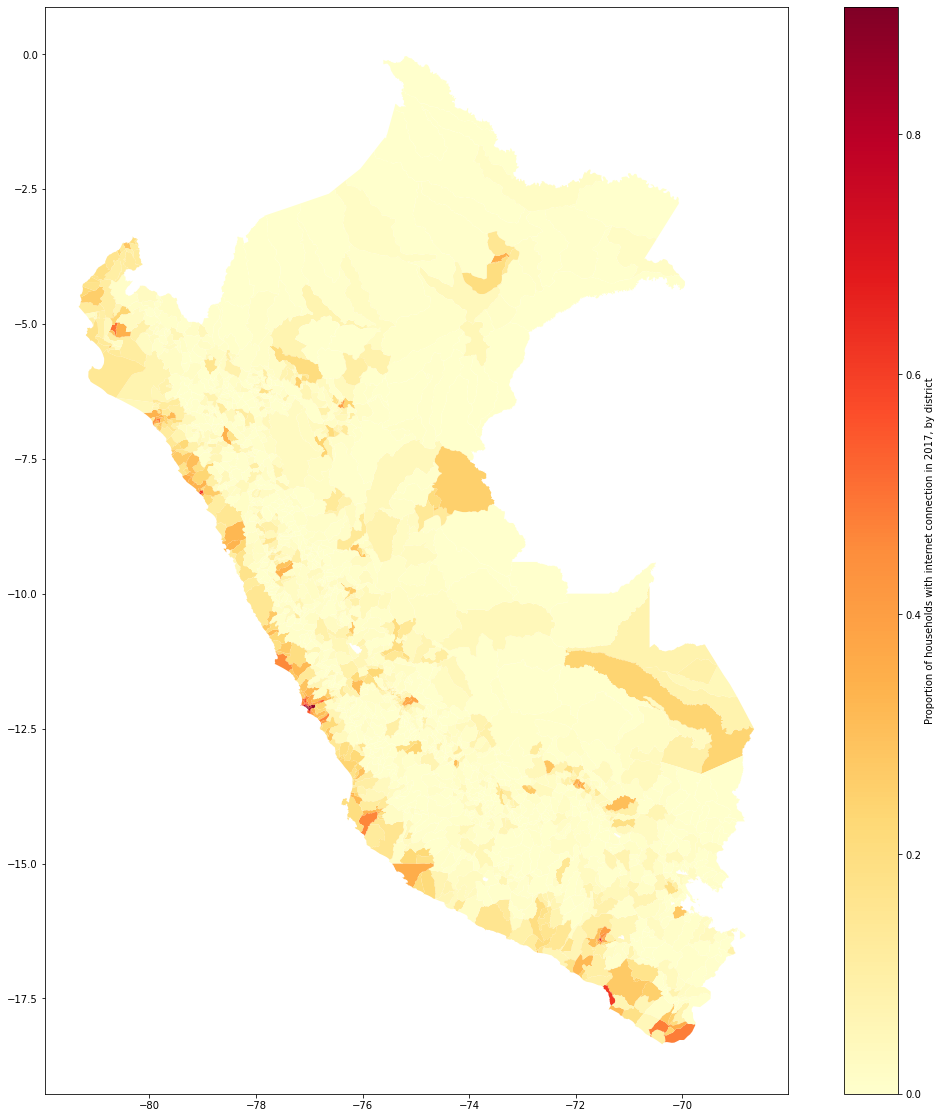

In [26]:
geo_data.plot(cmap = plt.cm.YlOrRd, column = 'prop_int_yes', figsize = (20, 20), legend = True, legend_kwds = dict(label = 'Proportion of households with internet connection in 2017, by district'))

In [51]:
geo_data_mercator = gpd.GeoDataFrame(dict(UBIGEO = geo_data.UBIGEO, 
                                          Total = geo_data.Total,
                                          tau_yes = geo_data.int_con_yes,
                                          tau_no = geo_data.int_con_no,
                                          pi_yes = geo_data.prop_int_yes,
                                          pi_no = 1 - geo_data.prop_int_yes,
                                          geometry = geo_data.geometry.to_crs(3857), 
                                          centroids = geo_data.geometry.to_crs(3857).centroid))

In [52]:
geo_data_mercator

,UBIGEO,Total,tau_yes,tau_no,pi_yes,pi_no,geometry,centroids
0,060504,875,1,874,0.001143,0.998857,"POLYGON ((-8784864.068 -817180.227, -8784633.4...",POINT (-8785076.978 -822057.259)
1,061105,549,0,549,0.000000,1.000000,"POLYGON ((-8796109.160 -777756.324, -8796000.1...",POINT (-8794608.937 -785449.537)
2,061109,1113,7,1106,0.006289,0.993711,"POLYGON ((-8818386.499 -764553.397, -8818258.2...",POINT (-8808870.276 -772964.140)
3,061110,760,1,759,0.001316,0.998684,"POLYGON ((-8803404.844 -781792.271, -8803191.0...",POINT (-8812160.194 -794416.882)
4,061203,327,1,326,0.003058,0.996942,"POLYGON ((-8780461.814 -792114.789, -8780292.5...",POINT (-8780111.741 -799023.699)
...,...,...,...,...,...,...,...,...
1869,040404,498,2,496,0.004016,0.995984,"POLYGON ((-8009601.779 -1670579.252, -8009611....",POINT (-8027944.579 -1710223.876)
1870,040405,304,6,298,0.019737,0.980263,"POLYGON ((-8056737.096 -1718017.468, -8056741....",POINT (-8057891.902 -1729643.119)
1871,040406,299,0,299,0.000000,1.000000,"POLYGON ((-8011636.714 -1704874.774, -8011610....",POINT (-8022660.754 -1736990.903)
1872,040407,516,38,478,0.073643,0.926357,"POLYGON ((-8049799.582 -1783222.985, -8049747....",POINT (-8055990.116 -1806166.086)


<AxesSubplot:>

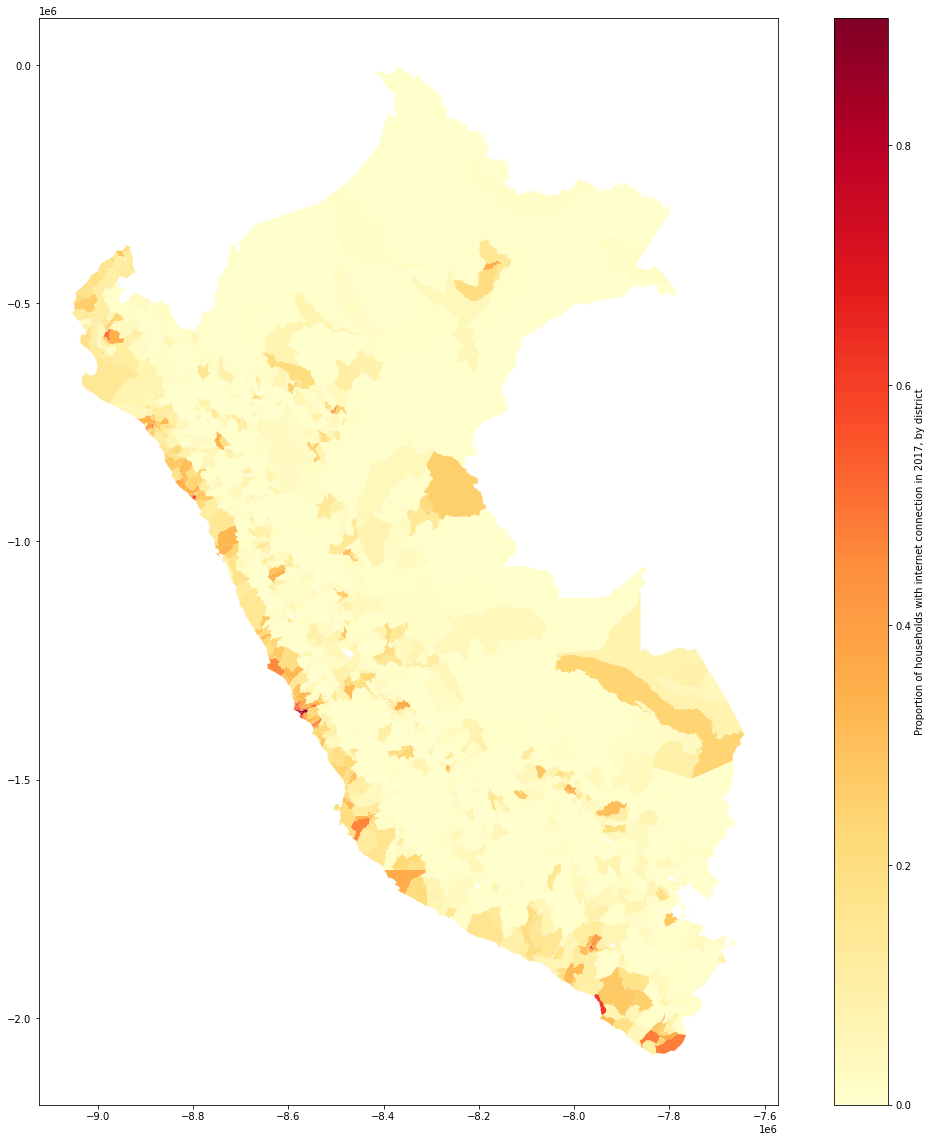

In [53]:
geo_data_mercator.plot(cmap = plt.cm.YlOrRd, column = 'pi_yes', figsize = (20, 20), legend = True, legend_kwds = dict(label = 'Proportion of households with internet connection in 2017, by district'))

In [54]:
dist_matrix = geo_data_mercator.centroids.apply(lambda g: geo_data_mercator.centroids.distance(g))

,0,1,2,3,4,5,6,7,8,9,...,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873
0,0.000000e+00,3.782834e+04,5.455507e+04,3.869743e+04,2.356265e+04,1.111936e+05,1.212736e+05,9.262201e+04,1.186306e+05,1.224920e+05,...,1.096926e+06,1.064803e+06,1.213033e+06,1.175713e+06,1.196185e+06,1.167086e+06,1.162975e+06,1.190958e+06,1.224760e+06,698784.091257
1,3.782834e+04,0.000000e+00,1.895444e+04,1.970939e+04,1.986018e+04,9.124483e+04,9.847045e+04,7.440674e+04,9.702941e+04,1.018321e+05,...,1.133124e+06,1.101637e+06,1.248412e+06,1.210454e+06,1.230963e+06,1.201242e+06,1.197603e+06,1.225290e+06,1.259929e+06,730604.287783
2,5.455507e+04,1.895444e+04,0.000000e+00,2.170354e+04,3.880920e+04,7.618373e+04,8.204829e+04,6.089799e+04,8.111313e+04,8.618553e+04,...,1.151205e+06,1.119322e+06,1.266828e+06,1.229049e+06,1.249550e+06,1.219959e+06,1.216225e+06,1.243975e+06,1.278411e+06,749544.112132
3,3.869743e+04,1.970939e+04,2.170354e+04,0.000000e+00,3.237786e+04,7.586580e+04,8.463928e+04,5.798373e+04,8.253479e+04,8.691433e+04,...,1.134716e+06,1.101975e+06,1.251291e+06,1.214194e+06,1.234656e+06,1.205693e+06,1.201486e+06,1.229535e+06,1.263103e+06,737403.298589
4,2.356265e+04,1.986018e+04,3.880920e+04,3.237786e+04,0.000000e+00,1.080273e+05,1.162412e+05,9.032553e+04,1.144146e+05,1.189582e+05,...,1.114016e+06,1.082919e+06,1.228983e+06,1.190861e+06,1.211378e+06,1.181542e+06,1.177987e+06,1.205618e+06,1.240439e+06,710744.524563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1.167086e+06,1.201242e+06,1.219959e+06,1.205693e+06,1.181542e+06,1.269763e+06,1.282009e+06,1.251972e+06,1.278255e+06,1.280531e+06,...,1.851004e+05,2.626480e+05,1.098624e+05,4.541293e+04,5.619519e+04,0.000000e+00,3.569242e+04,2.728356e+04,9.995729e+04,483802.005921
1870,1.162975e+06,1.197603e+06,1.216225e+06,1.201486e+06,1.177987e+06,1.264366e+06,1.276727e+06,1.246738e+06,1.272895e+06,1.275033e+06,...,1.518135e+05,2.298170e+05,8.085131e+04,1.555227e+04,3.534509e+04,3.569242e+04,0.000000e+00,3.598922e+04,7.654660e+04,487403.959209
1871,1.190958e+06,1.225290e+06,1.243975e+06,1.229535e+06,1.205618e+06,1.293157e+06,1.305448e+06,1.275427e+06,1.301663e+06,1.303886e+06,...,1.858094e+05,2.639312e+05,9.009769e+04,3.525066e+04,3.557824e+04,2.728356e+04,3.598922e+04,0.000000e+00,7.678576e+04,509805.657024
1872,1.224760e+06,1.259929e+06,1.278411e+06,1.263103e+06,1.240439e+06,1.324379e+06,1.336877e+06,1.306985e+06,1.332947e+06,1.334900e+06,...,1.601359e+05,2.335354e+05,2.233741e+04,6.100679e+04,4.396746e+04,9.995729e+04,7.654660e+04,7.678576e+04,0.000000e+00,558364.660625
